In [1]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import statistics

In [2]:
#read and shuffle data
df = pd.read_csv("dataset_comb.csv")
df = df.sample(frac = 1)

In [3]:
df['Class'].value_counts()

jasmine    9985
Gonen      8200
Name: Class, dtype: int64

In [4]:
df = df.drop(['id'], axis = 1)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
6999,6509,160.155938,52.582583,0.944566,6676,91.035796,0.527130,354.295,0.651620,3.045798,jasmine
18112,7922,161.773530,63.139349,0.920690,8127,100.432085,0.781031,373.315,0.714322,2.562167,Gonen
12977,8714,155.825930,71.918686,0.887123,8922,105.332850,0.630353,376.732,0.771547,2.166696,Gonen
8759,9146,154.161863,76.134331,0.869542,9301,107.912228,0.645084,371.853,0.831187,2.024867,Gonen
18027,10098,179.835347,72.386443,0.915413,10367,113.389475,0.631283,419.695,0.720407,2.484379,Gonen
...,...,...,...,...,...,...,...,...,...,...,...
7102,6414,160.404286,52.572006,0.944766,6697,90.369013,0.451436,361.031,0.618372,3.051135,jasmine
12743,8363,152.330302,70.593844,0.886136,8584,103.189643,0.578834,364.520,0.790914,2.157841,Gonen
15356,6558,138.166288,61.523636,0.895388,6804,91.377814,0.634481,331.205,0.751255,2.245743,Gonen
3374,5673,144.646449,51.139285,0.935417,5777,84.988752,0.473144,327.248,0.665685,2.828480,jasmine


In [5]:
#min-max normalisation
#convert class variables:   0 - jasmine & 1 - Gonen
for column in df.columns:
    if column!='Class':
        maxx = df[column].max()
        minn = df[column].min()
        for e in df[column]:
            e1 = (maxx - e)/(maxx - minn)
            df[column] = df[column].replace(e, e1)
    elif column == 'Class':
        for e in df[column]:
            if e == 'jasmine':
                df[column] = df[column].replace(e, 0)
            elif e == 'Gonen':
                df[column] = df[column].replace(e, 1)

In [6]:
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
6999,0.481400,0.211366,0.622510,0.076544,0.513940,1.954015,0.714125,0.495082,0.346677,0.339132,0
18112,0.297607,0.196537,0.403221,0.158840,0.341796,1.953493,0.209685,1.631087,0.260802,0.528515,1
12977,0.194589,0.251063,0.220853,0.274536,0.247479,1.954014,0.509046,0.423052,0.182428,0.683376,1
8759,0.138398,0.266318,0.133284,0.335137,0.202515,1.954015,0.479779,0.438715,0.100748,0.738914,1
18027,0.014568,0.030951,0.211137,0.177027,0.076047,0.010934,0.507199,0.285127,0.252468,0.558976,1
...,...,...,...,...,...,...,...,...,...,...,...
7102,0.493757,0.209090,0.622730,0.075857,0.511449,1.954015,0.864510,0.473457,0.392211,0.337042,0
12743,0.240245,0.283110,0.248374,0.277941,0.287579,1.953478,0.611401,0.462256,0.155904,0.686843,1
15356,0.475026,0.412962,0.436783,0.246050,0.498754,1.953541,0.500844,0.569208,0.210219,0.652422,1
3374,0.590140,0.353553,0.652491,0.108080,0.620596,1.954015,0.821381,0.581911,0.327413,0.424231,0


In [7]:
data = df.to_numpy()
data.shape

(18185, 11)

In [8]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

# Logistic Regression

In [9]:
accuracy_log_test = []
accuracy_log_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)

In [10]:
#printing accuracies 
print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))

Mean accuracy for test set =  0.9870222012972442
Mean accuracy for train set =  0.9871047554851611


# Linear Perceptron

In [11]:
accuracy_lp_test = []
accuracy_lp_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])

    #convert into array  
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = Perceptron(tol = 1e-3, random_state=0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_lp = clf.predict(test_data_xn)
    train_pred_y_lp = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_lp = accuracy_score(test_data_yn, test_pred_y_lp)
    accuracy_lp_test.append(acc1_lp)
    
    acc2_lp = accuracy_score(train_data_yn, train_pred_y_lp)
    accuracy_lp_train.append(acc2_lp)

In [12]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_lp_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_lp_train))

Mean accuracy for test set =  0.9772893763121429
Mean accuracy for train set =  0.9789844471974692


# SVM

In [13]:
accuracy_svm_test = []
accuracy_svm_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = SVC(kernel = 'rbf')
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_svm = clf.predict(test_data_xn)
    train_pred_y_svm = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_svm = accuracy_score(test_data_yn, test_pred_y_svm)
    accuracy_svm_test.append(acc1_svm)
    
    acc2_svm = accuracy_score(train_data_yn, train_pred_y_svm)
    accuracy_svm_train.append(acc2_svm)

In [14]:
#printing accuracies 
print("Mean accuracy for test set = ", statistics.mean(accuracy_svm_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_svm_train))

Mean accuracy for test set =  0.9883419612872943
Mean accuracy for train set =  0.9887178072073298


# Naive Bayes

In [15]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)

In [16]:
#printing accuracies 
print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.9847126054345968
Mean accuracy for train set =  0.9846576812856449


# Fisher Linear Discriminant

In [17]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)

In [18]:
#printing accuracies
print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.9839977274999565
Mean accuracy for train set =  0.9841169452691372


# Artificial Neural Networks

In [19]:
accuracy_ann_test = []
accuracy_ann_train = []

for i in range(7):
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:10])
                train_data_y.append(data_g[j][w][10])
        elif j == i:
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:10])
                test_data_y.append(data_g[j][w][10])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = MLPClassifier(hidden_layer_sizes = (10, 10, 10, 10,), max_iter = 1000, activation = 'logistic', solver = 'adam', random_state = 1)
    
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_ann = clf.predict(test_data_xn)
    train_pred_y_ann = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_ann = accuracy_score(test_data_yn, test_pred_y_ann)
    accuracy_ann_test.append(acc1_ann)
    
    acc2_ann = accuracy_score(train_data_yn, train_pred_y_ann)
    accuracy_ann_train.append(acc2_ann)

In [20]:
#printing accuracies 
print("Mean accuracy for test set = ", statistics.mean(accuracy_ann_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_ann_train))

Mean accuracy for test set =  0.9870772098235657
Mean accuracy for train set =  0.9879662739908095


# Box Plot

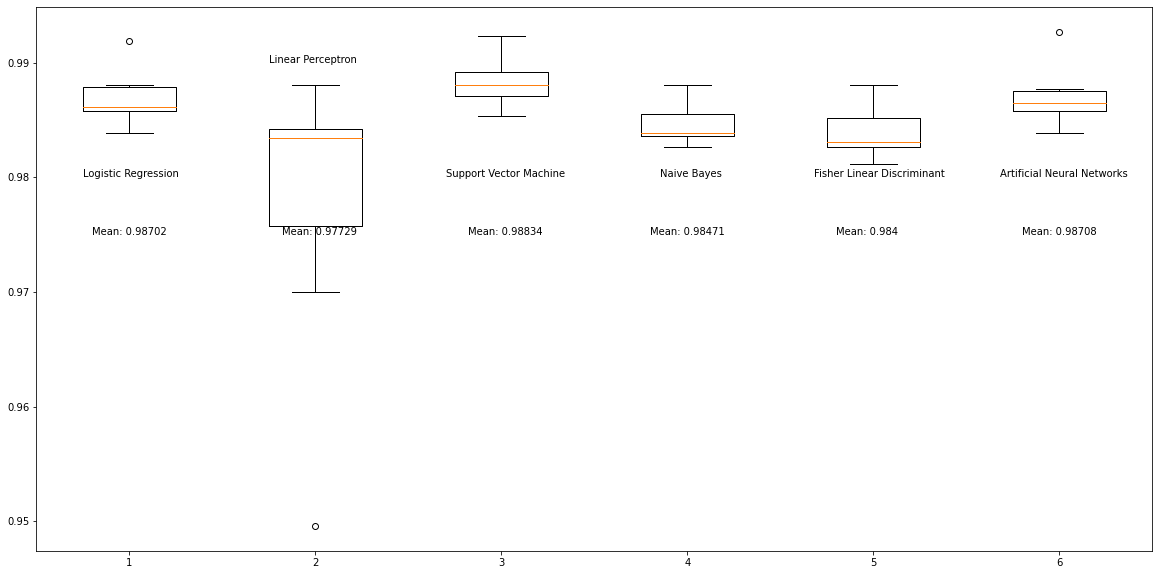

In [21]:
fig = plt.figure(figsize = (20, 10))
plt.boxplot([accuracy_log_test, accuracy_lp_test, accuracy_svm_test, accuracy_nb_test, accuracy_fl_test, accuracy_ann_test])

plt.text(0.75, 0.98, "Logistic Regression")
plt.text(0.80, 0.975, "Mean: " + str(round(statistics.mean(accuracy_log_test), 5)))

plt.text(1.75, 0.99, "Linear Perceptron")
plt.text(1.82, 0.975, "Mean: " + str(round(statistics.mean(accuracy_lp_test), 5)))

plt.text(2.70, 0.98, "Support Vector Machine")
plt.text(2.82, 0.975, "Mean: " + str(round(statistics.mean(accuracy_svm_test), 5)))

plt.text(3.85, 0.98, "Naive Bayes")
plt.text(3.80, 0.975, "Mean: " + str(round(statistics.mean(accuracy_nb_test), 5)))

plt.text(4.68, 0.98, "Fisher Linear Discriminant")
plt.text(4.80, 0.975, "Mean: " + str(round(statistics.mean(accuracy_fl_test), 5)))

plt.text(5.68, 0.98, "Artificial Neural Networks")
plt.text(5.80, 0.975, "Mean: " + str(round(statistics.mean(accuracy_ann_test), 5)))

plt.show() 